## Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.
<br>The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.
<br>Download the data in the same folder and run the following commmand to get it in the environment

<b>Import Libraries</b>

In [1]:
import sqlite3
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

C:\Users\Home\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<b>Read Data from the Database into pandas</b>

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

<b> Understanding the Data</b>

In [3]:
df.shape

(183978, 42)

In [4]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [6]:
# Drop NaNs or Nulls
df1 = df.dropna()

In [7]:
df1.shape

(180354, 42)

<b>Exploratory Data Analysis</b>

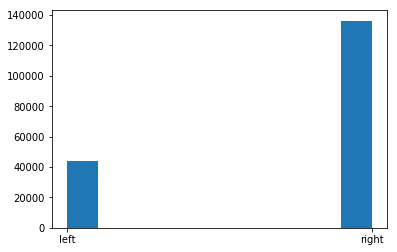

In [8]:
plt.hist(df1['preferred_foot'])
plt.show()

Checking if the preferred foot affects the overall rating.

In [9]:
df1['overall_rating'][df1['preferred_foot']=='left'].mean()

68.65282154760015

In [10]:
df1['overall_rating'][df1['preferred_foot']=='right'].mean()

68.62965056111327

The Mean is same irrespective of the preferred foot. Visualisation of the distribution

(array([1.7000e+01, 1.8400e+02, 1.2170e+03, 5.3450e+03, 1.7811e+04,
        4.1678e+04, 4.2036e+04, 2.2069e+04, 5.4130e+03, 4.7700e+02]),
 array([33., 39., 45., 51., 57., 63., 69., 75., 81., 87., 93.]),
 <a list of 10 Patch objects>)

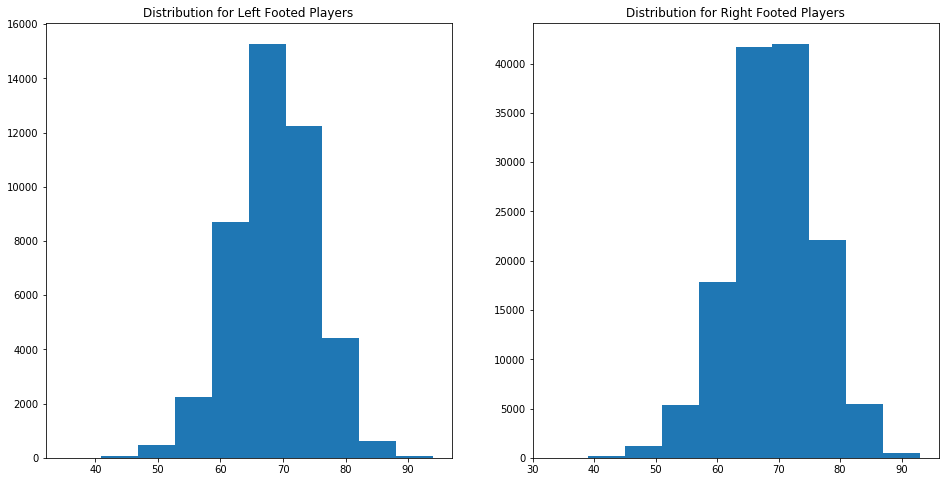

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.set_title('Distribution for Left Footed Players')
ax1.hist(df1['overall_rating'][df1['preferred_foot']=='left'])
ax2.set_title('Distribution for Right Footed Players')
ax2.hist(df1['overall_rating'][df1['preferred_foot']=='right'])

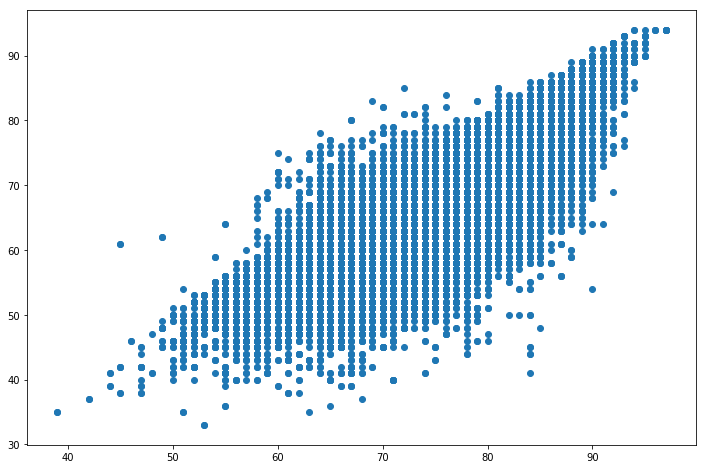

In [12]:
#Overall Rating w.r.t Potential
plt.figure(figsize=(12,8))
plt.scatter(df1['potential'],df1['overall_rating'])
plt.show()

Individual attributes vs Overall Rating

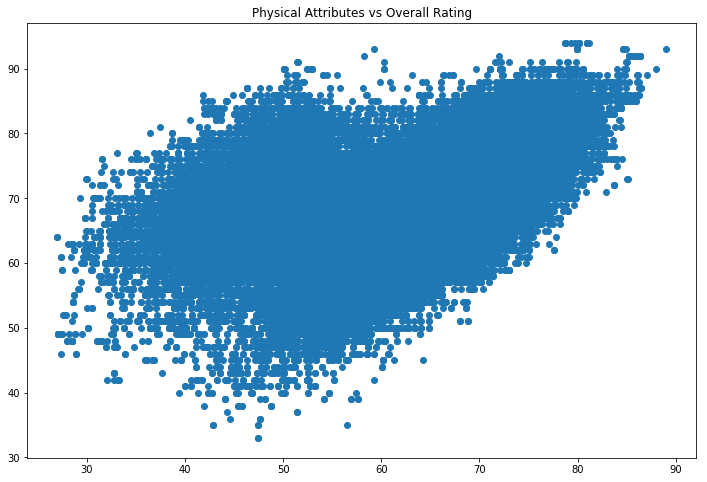

In [13]:
plt.figure(figsize=(12,8))
plt.title("Physical Attributes vs Overall Rating")
plt.scatter(df1.loc[:,['sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
                       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',]].mean(axis = 1),df1['overall_rating'])
plt.show()

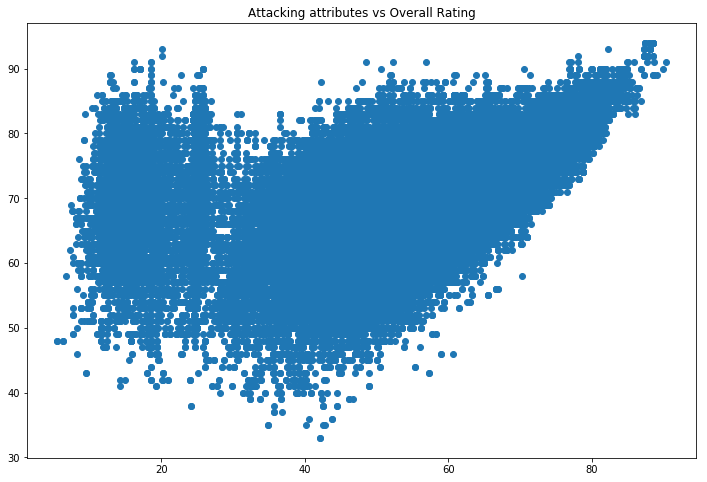

In [14]:
plt.figure(figsize=(12,8))
plt.title("Attacking attributes vs Overall Rating")
plt.scatter(df1.loc[:,['crossing', 'finishing', 'heading_accuracy', 'volleys', 'dribbling', 'curve',
                       'free_kick_accuracy','ball_control']].mean(axis = 1),df1['overall_rating'])
plt.show()

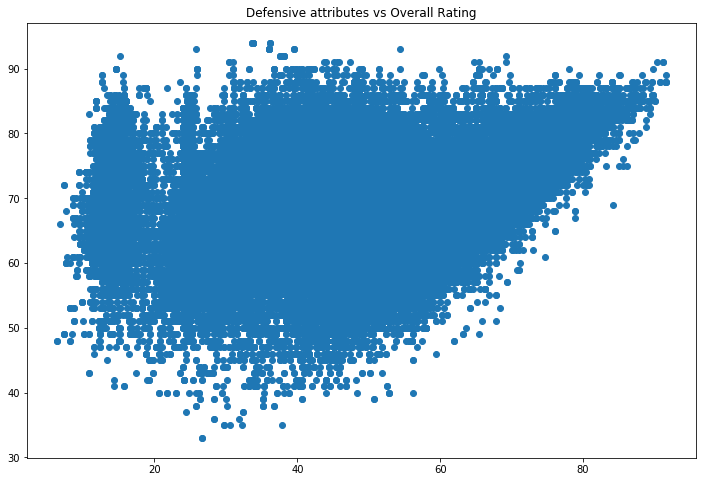

In [15]:
plt.figure(figsize=(12,8))
plt.title("Defensive attributes vs Overall Rating")
plt.scatter(df1.loc[:,['interceptions', 'positioning', 'marking','standing_tackle',
                       'sliding_tackle',]].mean(axis = 1),df1['overall_rating'])
plt.show()

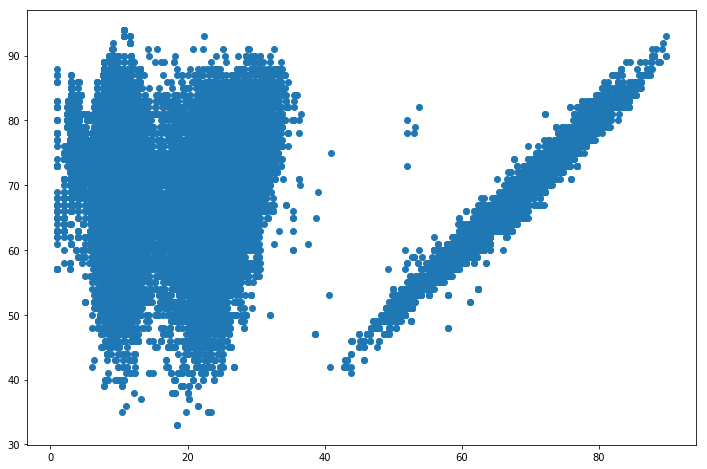

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(df1.loc[:,['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']].mean(axis = 1),df1['overall_rating'])
plt.show()

<b>Cleaning the Data</b>

In [17]:
#Check for columns having Object data
df1.describe(include = 'O')

,date,preferred_foot,attacking_work_rate,defensive_work_rate
count,180354,180354,180354,180354
unique,197,2,8,18
top,2007-02-22 00:00:00,right,medium,medium
freq,10410,136247,125070,130846


In [18]:
#Since 'attacking_work_rate and defensive_work_rate has a lot of garbage values, we will impute those values with None
df1['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [19]:
df1['new_attacking_work_rate'] = "None"
df1.loc[df1['attacking_work_rate'] == 'medium' ,'new_attacking_work_rate'] = 'medium'
df1.loc[df1['attacking_work_rate'] == 'high' ,'new_attacking_work_rate'] = 'high'
df1.loc[df1['attacking_work_rate'] == 'low' ,'new_attacking_work_rate'] = 'low'

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
df1['new_attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3892
Name: new_attacking_work_rate, dtype: int64

In [21]:
df1['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [22]:
df1['new_defensive_work_rate'] = "None"
df1.loc[df1['defensive_work_rate'] == 'medium' ,'new_defensive_work_rate'] = 'medium'
df1.loc[df1['defensive_work_rate'] == 'high' ,'new_defensive_work_rate'] = 'high'
df1.loc[df1['defensive_work_rate'] == 'low' ,'new_defensive_work_rate'] = 'low'

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
df1['new_defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
None        4035
Name: new_defensive_work_rate, dtype: int64

In [24]:
# One Hot encoding for the Preferred foot, attacking and defensive work rates
cat_cols =  ["preferred_foot", "new_attacking_work_rate", "new_defensive_work_rate"]

In [25]:
for col in cat_cols:
    dummies = pd.get_dummies(df1[col], prefix = col)
    df1 = df1.join(dummies)
    df1 = df1.drop(col, axis = 1)

In [26]:
df1.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'attacking_work_rate', 'defensive_work_rate', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'preferred_foot_left', 'preferred_foot_right',
       'new_attacking_work_rate_None', 'new_attacking_work_rate_high',
       'new_attacking_work_rate_low', 'new_attacking_work_rate_medium',
       'new_defensive_work_rate_None', 'new_defensive_work_rate_high',
       'new_defensive_work_rate_low', 'new_defensive_work_rate_medium

In [27]:
#Dropping Ids and other columns. We drop the date as the date column is the date on which the row was entered. This will not help in regression.
df1 = df1.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date','attacking_work_rate', 'defensive_work_rate'], axis =1 )

In [28]:
df1.shape

(180354, 45)

<b>X and y data for the Linear Regression Model</b>

In [29]:
y = df1.pop("overall_rating")

In [30]:
X = df1

<b> Train test Split</b>

In [31]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3)

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<b>Verifying the accuracy of the model against the Training Set</b>

In [34]:
train_pred = lm.predict(train_x)

In [35]:
np.sqrt(mean_squared_error(train_y, train_pred))

2.7740880389078537

We are getting a training RMSE of 2.76 which is not bad. This means that on average the prediction is different from the actual rating by an average value of 2.76. Lets run the model against the Test Set.

<b>Verifying the accuracy of the model against the Test Set</b>

In [36]:
test_pred = lm.predict(test_x)

In [37]:
np.sqrt(mean_squared_error(test_y, test_pred))

2.772608674183735

We are getting RMSE of 2.78 which is similar to what we got on the training set.

<b> K- Fold Cross Validation</b>

In [38]:
scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10)
scores, scores.mean()

(array([-7.78084355, -7.58086008, -7.63139987, -7.73968958, -7.53307117,
        -8.15659756, -7.54900643, -7.76290066, -7.86524087, -7.68959378]),
 -7.728920354382183)

In [39]:
np.sqrt(scores.mean() * -1)

2.780093587342373

K-Fold Validation gives us a RMSE of 2.78 which is close to what we got earlier suggesting that the model is robust.